
# Conversion Rate


## Goal: 
1. Build a model to predict conversion rate
2. Make recommendations to improve revenue (product team, marketing team)--increase conversion rate

## Step 1: Load, Investigate and Clean Data

In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from ggplot import *

In [312]:
#load data into dataframe name conversion
conversion = pd.read_csv(r'C:\Users\lshen\Downloads\conversion_data.csv')

In [313]:
conversion.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [314]:
conversion.dtypes

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object

In [315]:
conversion.shape

(316200, 6)

In [316]:
#check if there is any null value. No null is found.
conversion.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [317]:
#check if there is any weird/wrong data
conversion.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [318]:
conversion.age.unique()

array([ 25,  23,  28,  39,  30,  31,  27,  29,  38,  43,  24,  36,  37,
        33,  20,  35,  17,  50,  22,  18,  34,  19,  42,  32,  21,  48,
        40,  41,  26,  45,  44,  49,  46,  56,  52,  54,  51,  47,  53,
        60,  57,  55,  59,  61,  58,  62,  65,  63,  66,  67,  64,  68,
        69, 123,  70,  73,  77,  72,  79, 111], dtype=int64)

In [319]:
#check what's the data for age > 79. There is only 2 compared with 316200 data points, so remove these two records.
#one action item: might express the issue with software engineer, to check is there is any bug affect data accuracy.
conversion[conversion['age']>79]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [320]:
#remove, and check
conversion = conversion[conversion['age']<80]
conversion.shape

(316198, 6)

## Step2: Data Exploration and Analysis

In [321]:
conversion['converted'].value_counts()

0    306000
1     10198
Name: converted, dtype: int64

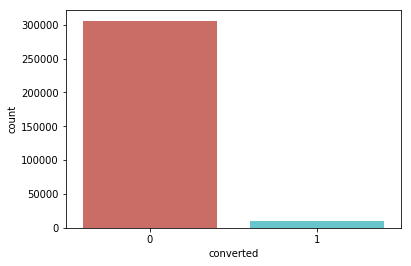

In [322]:
sns.countplot(x='converted',data=conversion, palette='hls')

In [323]:
conversion.groupby('converted').mean()

,age,new_user,total_pages_visited
converted,,,
0,30.703961,0.698382,4.550281
1,26.529025,0.298000,14.553932


In [324]:
data_country = conversion.groupby('country').converted.mean()

In [325]:
data_country

country
China      0.001332
Germany    0.062428
UK         0.052612
US         0.037801
Name: converted, dtype: float64

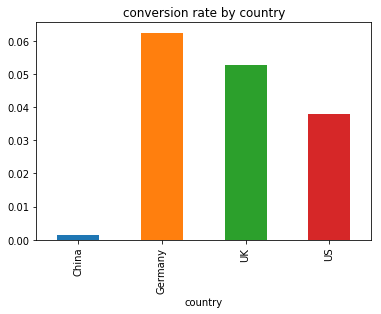

In [326]:
#use pandas dataframe function to visulaize, get a sense of the data and have some observations

#China converts extreamly low
data_country.plot(title = 'conversion rate by country',kind = 'bar')

In [494]:
# total users in each country
users = pd.Series(conversion.groupby('country').size(), name = 'total_users')
users

country
China       76602
Germany     13055
UK          48449
US         178092
Name: total_users, dtype: int64

In [488]:
# converted user number in each country
converted_users = pd.Series(conversion[conversion['converted']==1].groupby('country').size(), name = 'converted')
converted_users

country
China       102
Germany     815
UK         2549
US         6732
Name: converted, dtype: int64

In [489]:
u = pd.concat([users, converted_users], axis = 1)

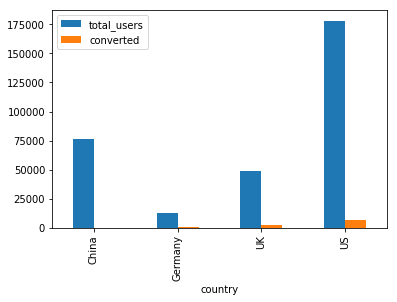

In [490]:
u.plot(kind = 'bar')

In [327]:
data_age = conversion.groupby('age').converted.mean()

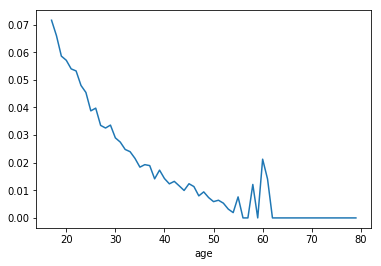

In [328]:
data_age.plot()

In [329]:
data_user = conversion.groupby('new_user').converted.mean()

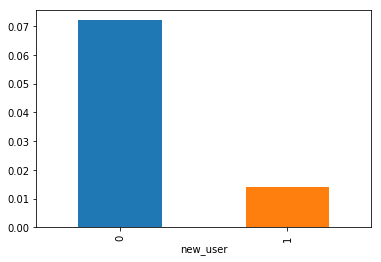

In [330]:
data_user.plot(kind = 'bar')

In [331]:
pd.crosstab(conversion['converted'],conversion['new_user'])

new_user,0,1
converted,,
0,92295,213705
1,7159,3039


In [332]:
data_source = conversion.groupby('source').converted.mean()

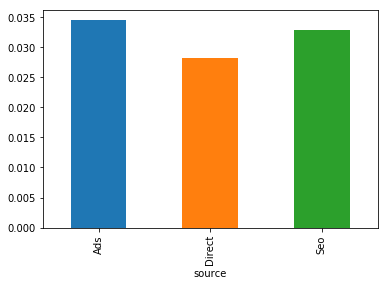

In [333]:
data_source.plot(kind='bar')

In [334]:
data_page = conversion.groupby('total_pages_visited').converted.mean()

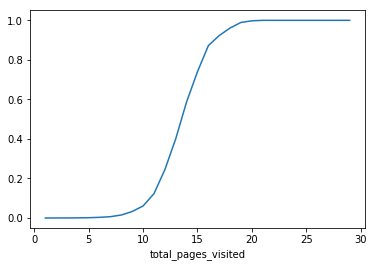

In [335]:
#spend more time, higher probability of conversion
data_page.plot()

#### Create dummy variables for categorical columns

In [338]:
#create k-1 dummy variables
#in this case, use China, ads as baseline
country_dummies = pd.get_dummies(conversion.country, prefix='country').iloc[:,1:]

In [339]:
country_dummies.head()

,country_Germany,country_UK,country_US
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,0
4,0,0,1


In [340]:
source_dummies = pd.get_dummies(conversion.source,prefix='source').iloc[:,1:]

In [341]:
source_dummies.head()

,source_Direct,source_Seo
0,0,0
1,0,1
2,0,1
3,0,1
4,0,1


In [342]:
conversion = pd.concat([conversion,country_dummies,source_dummies],axis=1 )

In [343]:
conversion.head()

,country,age,new_user,source,total_pages_visited,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,UK,25,1,Ads,1,0,0,1,0,0,0
1,US,23,1,Seo,5,0,0,0,1,0,1
2,US,28,1,Seo,4,0,0,0,1,0,1
3,China,39,1,Seo,5,0,0,0,0,0,1
4,US,30,1,Seo,6,0,0,0,1,0,1


In [344]:
conversion.columns.values

array(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted', 'country_Germany', 'country_UK', 'country_US',
       'source_Direct', 'source_Seo'], dtype=object)

In [345]:
#define feature and response variables.
feature_cols = ['country_Germany', 'country_UK', 'country_US','age', 'new_user','source_Direct', 'source_Seo','total_pages_visited']
X = conversion[feature_cols]
y = conversion['converted']

In [346]:
print (X.shape)
print (y.shape)

(316198, 8)
(316198,)


#### Feature Selection

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhaustmed. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [347]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#a workaround to solve result.summary() error
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [348]:
#Instantiate the estimator - create an instance of LogisticRegression model
logreg = LogisticRegression()

#the numeric values means how many features to select, but how do we decide the number?
rfe = RFE(logreg,8)
rfe = rfe.fit(X,y)
print (rfe.support_)
print (rfe.ranking_)
#selected features rank 1

[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]


In [349]:
#statistics & econometrics package with useful tools for parameter estimation & statistical testing
import statsmodels.api as sm
logit_model = sm.Logit(y,X)
#fit the model
result = logit_model.fit()
print (result.summary())

#the P values for all the variables are smaller than 0.05, therefore, most of them are significant to the model

Optimization terminated successfully.
         Current function value: 0.057637
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               316198
Model:                          Logit   Df Residuals:                   316190
Method:                           MLE   Df Model:                            7
Date:                Wed, 07 Mar 2018   Pseudo R-squ.:                  0.5955
Time:                        16:05:30   Log-Likelihood:                -18225.
converged:                       True   LL-Null:                       -45053.
                                        LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
country_Germany         0.4486      0.068      6.641      0.000       0.316       0.581
c

## Step 3: Build Model to Predict Conversion Rate - Machine Learning

This is a supervised learning - classification problem. Following models might be used.
1. Logistic regression
2. Decision trees
3. RuleFit(often the best choice)
4. Random forest in combination with partial dependence plots

Pick one you know the best, and the reason why pick it. If have more time, can try other models/different parameters.

### 3.1 Logistic Regression

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

Logistic Regression Assumptions

-Binary logistic regression requires the dependent variable to be binary.<br>
-For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.<br>
-Only the meaningful variables should be included.<br>
-The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.<br>
-The independent variables are linearly related to the log odds.<br>
-Logistic regression requires quite large sample sizes.<br>
-Keeping the above assumptions in mind, let’s look at our dataset.

#### Model Fitting

In [350]:
#import model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [351]:
# split the data into train -- used in training phase and test -- used in validation phase
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=0)

In [352]:
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(221338, 8) (94860, 8) (221338,) (94860,)


In [353]:
#instantiate, fit model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [354]:
#predict the test set
y_pred = logreg.predict(X_test)

In [362]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [355]:
#Accuracy of logistic regression classifier on test set
logreg.score(X_test,y_test)

0.9860531309297913

In [356]:
# same as above: test accuracy
from sklearn import metrics
print (metrics.accuracy_score(y_test,y_pred))

0.98605313093


In [357]:
# train accuracy
metrics.accuracy_score(y_train, logreg.predict(X_train))

0.98622468803368601

In [358]:
pd.DataFrame(list(zip(X.columns, np.transpose(logreg.coef_))))

,0,1
0,country_Germany,[3.43722675766]
1,country_UK,[3.24175112127]
2,country_US,[2.86113313995]
3,age,[-0.0788638848899]
4,new_user,[-1.68470282355]
5,source_Direct,[-0.230628360566]
6,source_Seo,[-0.0494531929262]
7,total_pages_visited,[0.753731814908]


Some observations:
1. country in Germany, UK, US have more conversion rate
2. As age increases, converstion rate drops
3. New user has converts more
4. Coming from ads converts more

#### Cross Validation

Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. We are using 10-fold Cross-Validation to train our Logistic Regression model.

In [359]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits = 10, random_state=7)
modelCV = LogisticRegression()
scoring = "accuracy"
results = model_selection.cross_val_score(modelCV, X_train,y_train,cv=kfold,scoring = scoring)
print ('10-fold cross validation average accuracy: {}'.format(results.mean()))

10-fold cross validation average accuracy: 0.9862156541572151


The average accuracy remains very close to the Logistic Regression model accuracy; hence, we can conclude that our model generalizes well.

#### Confusion Matrix

In [360]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[91488   358]
 [  965  2049]]


91488+2049 correct predictions and 965+358 incorrect predictions<br>
eg. 91488 not converted are predict as not converted<br>
965 converted are predicted as not converted

#### Compute precision, recall, F-measure and support

precision: is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

recall: is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

F-measure: The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.<br>
The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [363]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     91846
          1       0.85      0.68      0.76      3014

avg / total       0.99      0.99      0.99     94860



#### ROC Curve

In [364]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

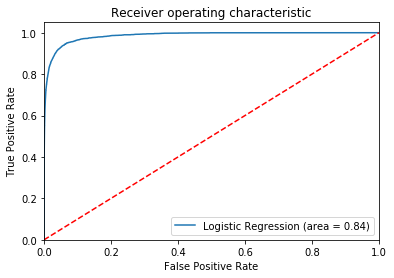

In [365]:
logit_roc_auc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

### 3.4 Random Forest

Introduction of Random Forest:<br>
Random forest algorithm is an ensemble classification algorithm. Ensemble classifier means a group of classifiers. Instead of using only one classifier to predict the target, In ensemble, we use multiple classifiers to predict the target.<br>
In case, of random forest, these ensemble classifiers are the randomly created decision trees. Each decision tree is a single classifier and the target prediction is based on the majority voting method.<br>

Pros: can be used in both regression and classification problems<br>
      can be also used in variable selection<br>
Cons: prone to overfitting, especially when working with relatively small datasets.

Reason of picking Random Forest:<br>
-Require very little time to optimize(its default params are often close to the best ones)<br>
-It is strong with outliers, irrelevant variables, continuous and discrete variables.

In [366]:
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Make the random number predictable, with the seed reset very time, the same set of numbers will appear
np.random.seed(0)

In [367]:
conversion.head()

,country,age,new_user,source,total_pages_visited,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,UK,25,1,Ads,1,0,0,1,0,0,0
1,US,23,1,Seo,5,0,0,0,1,0,1
2,US,28,1,Seo,4,0,0,0,1,0,1
3,China,39,1,Seo,5,0,0,0,0,0,1
4,US,30,1,Seo,6,0,0,0,1,0,1


In [419]:
feature_col = ['country_Germany', 'country_UK', 'country_US','age', 'new_user','source_Direct', \
               'source_Seo','total_pages_visited']

In [369]:
X = conversion[feature_col]
y = conversion['converted']
print (X.shape, y.shape)

(316198, 8) (316198,)


In [407]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3)

In [408]:
print (X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(221338, 8) (94860, 8) (221338,) (94860,)


In [409]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs = 2, random_state =0)

In [410]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [411]:
# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
y_pred = clf.predict(X_test)

In [412]:
# View the predicted probabilities of the observations
clf.predict_proba(X_test)

array([[ 0.99529112,  0.00470888],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       ..., 
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ]])

In [413]:
# calculate the accuracy of the trained classifier
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred))

0.983533628505


#### Cross Validation

In [414]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits = 10, random_state=7)
modelCV = RandomForestClassifier()
scoring = "accuracy"
results = model_selection.cross_val_score(modelCV, X_train,y_train,cv=kfold,scoring = scoring)
print ('10-fold cross validation average accuracy: {}'.format(results.mean()))

10-fold cross validation average accuracy: 0.9843452142787555


The avg accuacy score is very close to model

#### Confusion Matrix

In [415]:
#the columns are the predicted values, the rows are actual values. 
#The short explanation of how to interpret a confusion matrix is: anything on the diagonal 
#was classified correctly and anything off the diagonal was classified incorrectly.
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[91295   503]
 [ 1059  2003]]


In [416]:
#same as above
pd.crosstab(y_test, y_pred,rownames=['Actual Value'], colnames=['Predicted Value'])

Predicted Value,0,1
Actual Value,,
0,91295,503
1,1059,2003


#### Feature Importance

In [418]:
#get a score telling how importance each feature is in classifying
pd.DataFrame(list(zip(X.columns,clf.feature_importances_)))

,0,1
0,country_Germany,0.006594
1,country_UK,0.014321
2,country_US,0.014570
3,age,0.110436
4,new_user,0.037079
5,source_Direct,0.004024
6,source_Seo,0.005645
7,total_pages_visited,0.807331


Total pages visited is the most important factor so far, Unfortunatly, it's probably the least "actionable" one. In order to buy, they need to click multiple pages<br>

Let's rebuild the model without the total_pages_visited feature<br>
Since classes are heavily unbalanced and we don't have that very powerful variable anymore, change the weight a bit?

In [443]:
new_feature_col = ['country_Germany', 'country_UK', 'country_US','age', 'new_user','source_Direct', \
               'source_Seo']

In [444]:
X = conversion[new_feature_col]
y = conversion['converted']
print (X.shape,y.shape)

(316198, 7) (316198,)


In [445]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [446]:
rf = RandomForestClassifier(n_jobs = 2, random_state =0)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [447]:
# new test accuracy score
metrics.accuracy_score(y_test, y_pred)

0.96787897954880875

In [448]:
# new confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[91813,     0],
       [ 3047,     0]], dtype=int64)

In [449]:
# feature importance
pd.DataFrame(list(zip(X.columns,clf.feature_importances_)))

,0,1
0,country_Germany,0.006594
1,country_UK,0.014321
2,country_US,0.014570
3,age,0.110436
4,new_user,0.037079
5,source_Direct,0.004024
6,source_Seo,0.005645


## Step 4: Conclusion and Suggestions

### Conclusions:
1. Younger uses of this site has a much higher conversion rate.
2. Germany has the highest conversion rate yet smallest population.
3. Existing user has a much higher conversion rate.
4. China has a extremly low conversion rate.

### Suggestions:

1. Marketing to advise and use marketing channel to reach young people.
2. Marketing targe German market. Big opportunity.
3. Targted email with offers to bring users back
4. Product team to investigate on Chinese market. Poorly transalted? doesn't fit local culture? payment issue? Bad site experiences?
5. With age increases, conversion rate drops. Why?
6. For the users with many page visit but no conversion, find a way to bring them back. Large chance.
